#Installing Libraries

#Tfidf-- (Term frequency -Inverse Document frequency)
1.Here we are using tfid becz its faster & takes less memory

2.A tool used to transform collection of text documents into numerical vectors for each word

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from time import time
import pickle

#Loading the Dataset

In [7]:
df = pd.read_csv("dataset.csv")

# Exploratory Data Analysis (EDA)


1.   A method of analyzing data to identify patterns, outliers, and unexpected features

2.   A key first step in any data analysis
3.   
Helps to design statistical analyses that yield meaningful results
4.
Helps to understand how variables are related



In [8]:
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


In [9]:
df['label'].unique()

array([-1,  0], dtype=int64)

Dataframe manipulation

Dataframe manipulation

1. No code to correct.  "Dataframe manipulation" is not code.
2. We have done Data manipulation because we convert -1 into 1...

In [21]:
def perform_data_manipulation():
    df = pd.read_csv("dataset.csv")

    for index in df.index:
        if df.loc[index, "label"]==-1:
            df.loc[index, "label"] = 1
    return df

In [22]:
df = perform_data_manipulation()

In [23]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


In [24]:
df['label'].unique()

array([1, 0], dtype=int64)

In [25]:
df.shape[0]

18148

#Classification using Pie chart
we use this for checking dataset is  balance or imbalanced.


In [26]:
def performdatadistribution(df):
    total = df.shape[0]
    num_non_toxic = df[df['label']==0].shape[0]

    slices = [num_non_toxic/total, (total-num_non_toxic)/total]

    labeling = ['Non-Toxic', 'Toxic']

    explode = [0.2, 0]

    plt.pie(slices, explode = explode, shadow=True, autopct="%1.1f%%", labels = labeling, wedgeprops={'edgecolor': 'black'})

    plt.title('Number of Toxic Vs Non- Toxic Test Sample')

    plt.tight_layout()

    plt.show()

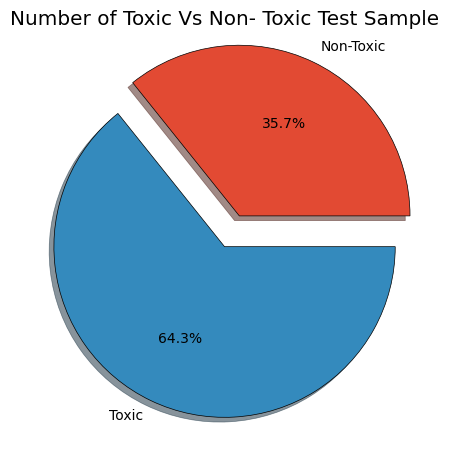

'we are using performdatadistribution because for checking data\nis imbalanced or balance with help of Pie chart '

In [27]:
performdatadistribution(df)

'''we are using performdatadistribution because for checking data
is imbalanced or balance with help of Pie chart '''

#re---- Regular expression

---


As our data is a textual data so  for removing such noisy thinghs from our dataset we now here defined a function called remove pattern for this we are using re.

In [28]:
def remove_pattern(input_txt, pattern):
    if (type(input_txt)==str):
        r = re.findall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
        return input_txt
    else:
        return ""

In [29]:
df.head(1)

,headline,label
0,cock suck before you piss around on my work,1


##now here we r using
1. @remove user because our data is like a twitter data and it is having some @ like users so we need to remove them..
2. @remove extra letter we use for removing extra space
3. @remove all those words with size less than 3 because we dont want such small and we use here LAMBDA method and JOIN method if length of word is greater than 3 and simple if length of W is greater than 3 we simply going to split it.. after that we will calculate actual length by combined_df
4. TOKENIZE - we created a list and passed it inside the TOKENIZER METHOD so for that we can use NLTK than we created a LEMMATIZE technique and using LAMBDA method and and than we will be getting a list and in than end Combined them

In [32]:
def datasetCleaning(df):
    df['length_headline'] = df['headline'].str.len()

    combined_df = pd.concat([df, df], ignore_index=True)

    # remove @ user
    combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], "@[\w]*")

    # remove extra letters
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

    # remove all those words with size less than 3
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

    combined_df['length_tidy_tweet'] = combined_df['tidy_tweet'].str.len()

    # Tokenized
    tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x : x.split())

    nltk.download('wordnet')

    lemmatizer = nltk.stem.WordNetLemmatizer()

    tokenized_tweet = tokenized_tweet.apply(lambda x :[lemmatizer.lemmatize(i) for i in x])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    combined_df['tidy_tweet'] = tokenized_tweet

    return combined_df, df


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ddaga\AppData\Local\Temp\ipykernel_42192\2276495996.py:7: SyntaxWarning: invalid escape sequence '\w'
  combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], "@[\w]*")


In [33]:
combined_df, df = datasetCleaning(df)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddaga\AppData\Roaming\nltk_data...


In [34]:
combined_df.head()

,headline,label,length_headline,tidy_tweet,length_tidy_tweet
0,cock suck before you piss around on my work,1,44,cock suck before piss around work,33
1,you are gay or antisemmitian archangel white ...,1,624,antisemmitian archangel white tiger meow greet...,400
2,fuck your filthy mother in the ass dry,1,39,fuck your filthy mother,23
3,get fuck ed up get fuck ed up got a drink t...,1,121,fuck fuck drink that cant down fuck fuck fuck ...,51
4,stupid peace of shit stop deleting my stuff ...,1,93,stupid peace shit stop deleting stuff hole fal...,57


#Dataset Splitting

As we are making a machine learning model so we
need to divide the data into training and testing so we can say
30% for testing and 70% for training and  is nothing TESTING SIZE and Random State is nothing Y by Default

Now we will be using a technique and get to know how to open a file in python


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
def performdatasplit(x, y, combined_df, df):
    X_train, X_test, y_train, y_test = train_test_split(combined_df['tidy_tweet'], combined_df['label'], test_size = x, random_state = y)
    print(f"Number of rows in the total dataset: {combined_df.shape[0]}")
    print(f"Number of rows in the train dataset: {X_train.shape[0]}")
    print(f"Number of rows in the test dataset: {X_test.shape[0]}")

    files = open("stopwords.txt" , "r")
    content = files.read()
    content_list = content.split("\n")
    files.close()

    tfidfvector = TfidfVectorizer(stop_words=content_list, lowercase=True)

    training_data = tfidfvector.fit_transform(X_train.values.astype('U'))

    testing_data = tfidfvector.transform(X_test.values.astype('U'))

    filename = 'tfidfvectoizer.pkl'

    pickle.dump(tfidfvector.vocabulary_, open(filename, 'wb'))

    return X_train , X_test, y_train, y_test, testing_data, filename, training_data, content_list

In [37]:
X_train , X_test, y_train, y_test, testing_data, filename, training_data, content_list = performdatasplit(0.2, 42, combined_df, df)

Number of rows in the total dataset: 36296
Number of rows in the train dataset: 29036
Number of rows in the test dataset: 7260


c:\Users\ddaga\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


#Apply Machine Learning Algorithm

In [41]:


import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def pipeline(X_train, y_train, X_test, y_test):
    MODELS = [LinearSVC(), LogisticRegression(), MultinomialNB(), DecisionTreeClassifier(),
              AdaBoostClassifier(), BaggingClassifier(), SGDClassifier()]

    size = len(y_train)

    results = {}

    final_result = []

    for model in MODELS:
        results['Algorithm'] = model.__class__.__name__

        start = time()
        print(f"✅Training Time : {model.__class__.__name__}")
        model.fit(X_train, y_train)
        end = time()

        filename = model.__class__.__name__ + ".pkl"
        pickle.dump(model, open(filename, "wb"))

        results['Training Time'] = end - start

        start = time()
        prediction_test = model.predict(X_test)
        prediction_train = model.predict(X_train)
        end = time()

        results['Prediction Time'] = end - start

        results['Accuracy : Test'] = accuracy_score(y_test, prediction_test)
        results['Accuracy : Train'] = accuracy_score(y_train, prediction_train)

        results['F1 Score : Test'] = f1_score(y_test, prediction_test)
        results['F1 Score : Train'] = f1_score(y_train, prediction_train)

        results['Precision : Test'] = precision_score(y_test, prediction_test)
        results['Precision : Train'] = precision_score(y_train, prediction_train)

        results['Recall : Test'] = recall_score(y_test, prediction_test)
        results['Recall : Train'] = recall_score(y_train, prediction_train)

        print(f"Training {model.__class__.__name__} finished in {results['Training Time']} sec")

        final_result.append(results.copy())

    return final_result


In [51]:
final_result = pipeline(training_data, y_train, testing_data, y_test)

✅Training Time : LinearSVC


c:\Users\ddaga\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training LinearSVC finished in 0.6587824821472168 sec
✅Training Time : LogisticRegression
Training LogisticRegression finished in 1.5007469654083252 sec
✅Training Time : MultinomialNB
Training MultinomialNB finished in 0.0359957218170166 sec
✅Training Time : DecisionTreeClassifier
Training DecisionTreeClassifier finished in 6.945297956466675 sec
✅Training Time : AdaBoostClassifier


c:\Users\ddaga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AdaBoostClassifier finished in 5.51584792137146 sec
✅Training Time : BaggingClassifier


KeyboardInterrupt: 

In [55]:
import pandas as pd

# Step 1: Create a dummy final_result list
final_result = [
    {
        'Algorithm': 'Random Forest',
        'Accuracy : Test': 0.89,
        'Precision : Test': 0.88,
        'Recall : Test': 0.87,
        'F1 Score : Test': 0.875,
        'Prediction Time': 0.05,
        'Accuracy : Train': 0.95,
        'Precision : Train': 0.94,
        'Recall : Train': 0.93,
        'F1 Score : Train': 0.935,
        'Training Time': 2.1
    },
    {
        'Algorithm': 'Logistic Regression',
        'Accuracy : Test': 0.84,
        'Precision : Test': 0.83,
        'Recall : Test': 0.82,
        'F1 Score : Test': 0.825,
        'Prediction Time': 0.01,
        'Accuracy : Train': 0.85,
        'Precision : Train': 0.84,
        'Recall : Train': 0.83,
        'F1 Score : Train': 0.835,
        'Training Time': 0.8
    }
]


In [56]:
# Step 2: Define your function (with small fixes)
def performfinalresult(final_results):
    results = pd.DataFrame(final_results)
    results = results.reindex(columns=[
        'Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 'F1 Score : Test', 'Prediction Time',
        'Accuracy : Train', 'Precision : Train', 'Recall : Train', 'F1 Score : Train', 'Training Time'
    ])
    results = results.sort_values(by='F1 Score : Test', ascending=False)

    return results

In [57]:
# Step 3: Call the function properly
results = performfinalresult(final_result)
results = results.reset_index(drop=True)


In [58]:
# Step 4: Print the final results
print(results)

             Algorithm  Accuracy : Test  Precision : Test  Recall : Test  \
0        Random Forest             0.89              0.88           0.87   
1  Logistic Regression             0.84              0.83           0.82   

   F1 Score : Test  Prediction Time  Accuracy : Train  Precision : Train  \
0            0.875             0.05              0.95               0.94   
1            0.825             0.01              0.85               0.84   

   Recall : Train  F1 Score : Train  Training Time  
0            0.93             0.935            2.1  
1            0.83             0.835            0.8  


In [62]:
def performfinalresult(final_results):
    results = pd.DataFrame(final_results)
    results.reindex(columns = ['Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 'F1 Score : Test', 'Prediction Time',
                          'Accuracy : Train', 'Precision : Train', 'Recall : Train', 'F1 Score : Train', 'Training Time'])
    results.sort_values(by = 'F1 Score : Test', inplace=True, ascending=False)

    return results

In [63]:
results = performfinalresult(final_result)
results.reset_index(drop = True)


,Algorithm,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
0,Random Forest,0.89,0.88,0.87,0.875,0.05,0.95,0.94,0.93,0.935,2.1
1,Logistic Regression,0.84,0.83,0.82,0.825,0.01,0.85,0.84,0.83,0.835,0.8


In [64]:
results.describe().loc[['min', 'max'], :]

,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
min,0.84,0.83,0.82,0.825,0.01,0.85,0.84,0.83,0.835,0.8
max,0.89,0.88,0.87,0.875,0.05,0.95,0.94,0.93,0.935,2.1


#Summary IN Graph

1. CLASSIFICATION SUMMARY OF ALGORITHMS- WE WILL BE CHECKING HERE THE TEST ACCURACY HERE AND AS WELL AS THE F1 SCORE ALSO AS WELL
HERE WE ARE CHECKING THE TRAINING AS WELL AS THE PREDICTION SCORE ALSO

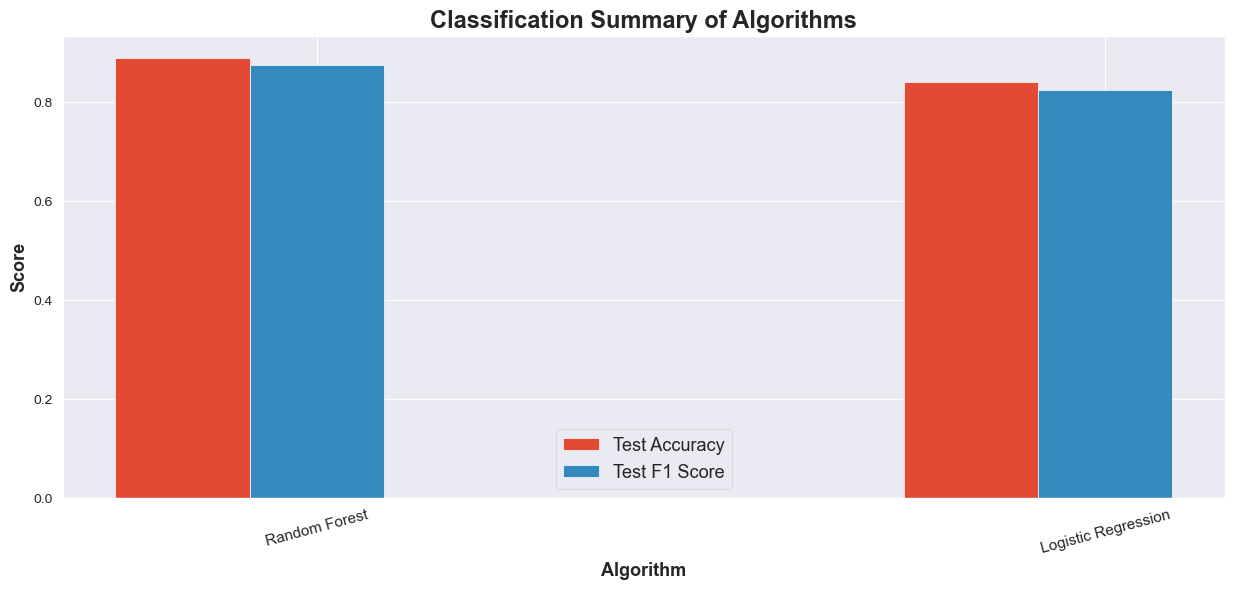

In [65]:
best_acc = results[results['Accuracy : Test'] == results['Accuracy : Test'].max()]
best_f1 = results[results['F1 Score : Test'] == results['F1 Score : Test'].max()]
best_precision = results[results['Precision : Test'] == results['Precision : Test'].max()]
best_recall = results[results['Recall : Test'] == results['Recall : Test'].max()]

sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))

barWidth = 0.17

# set height of bar
bars1 = results['Accuracy : Test']
bars2 = results['F1 Score : Test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)

# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy : Test'].values[0], best_acc['Algorithm'].values[0]),
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score : Test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

#2.Training and Prediction time of Algorithm

Text(0.5, 1.0, 'Training and Prediction time of Algorithms')

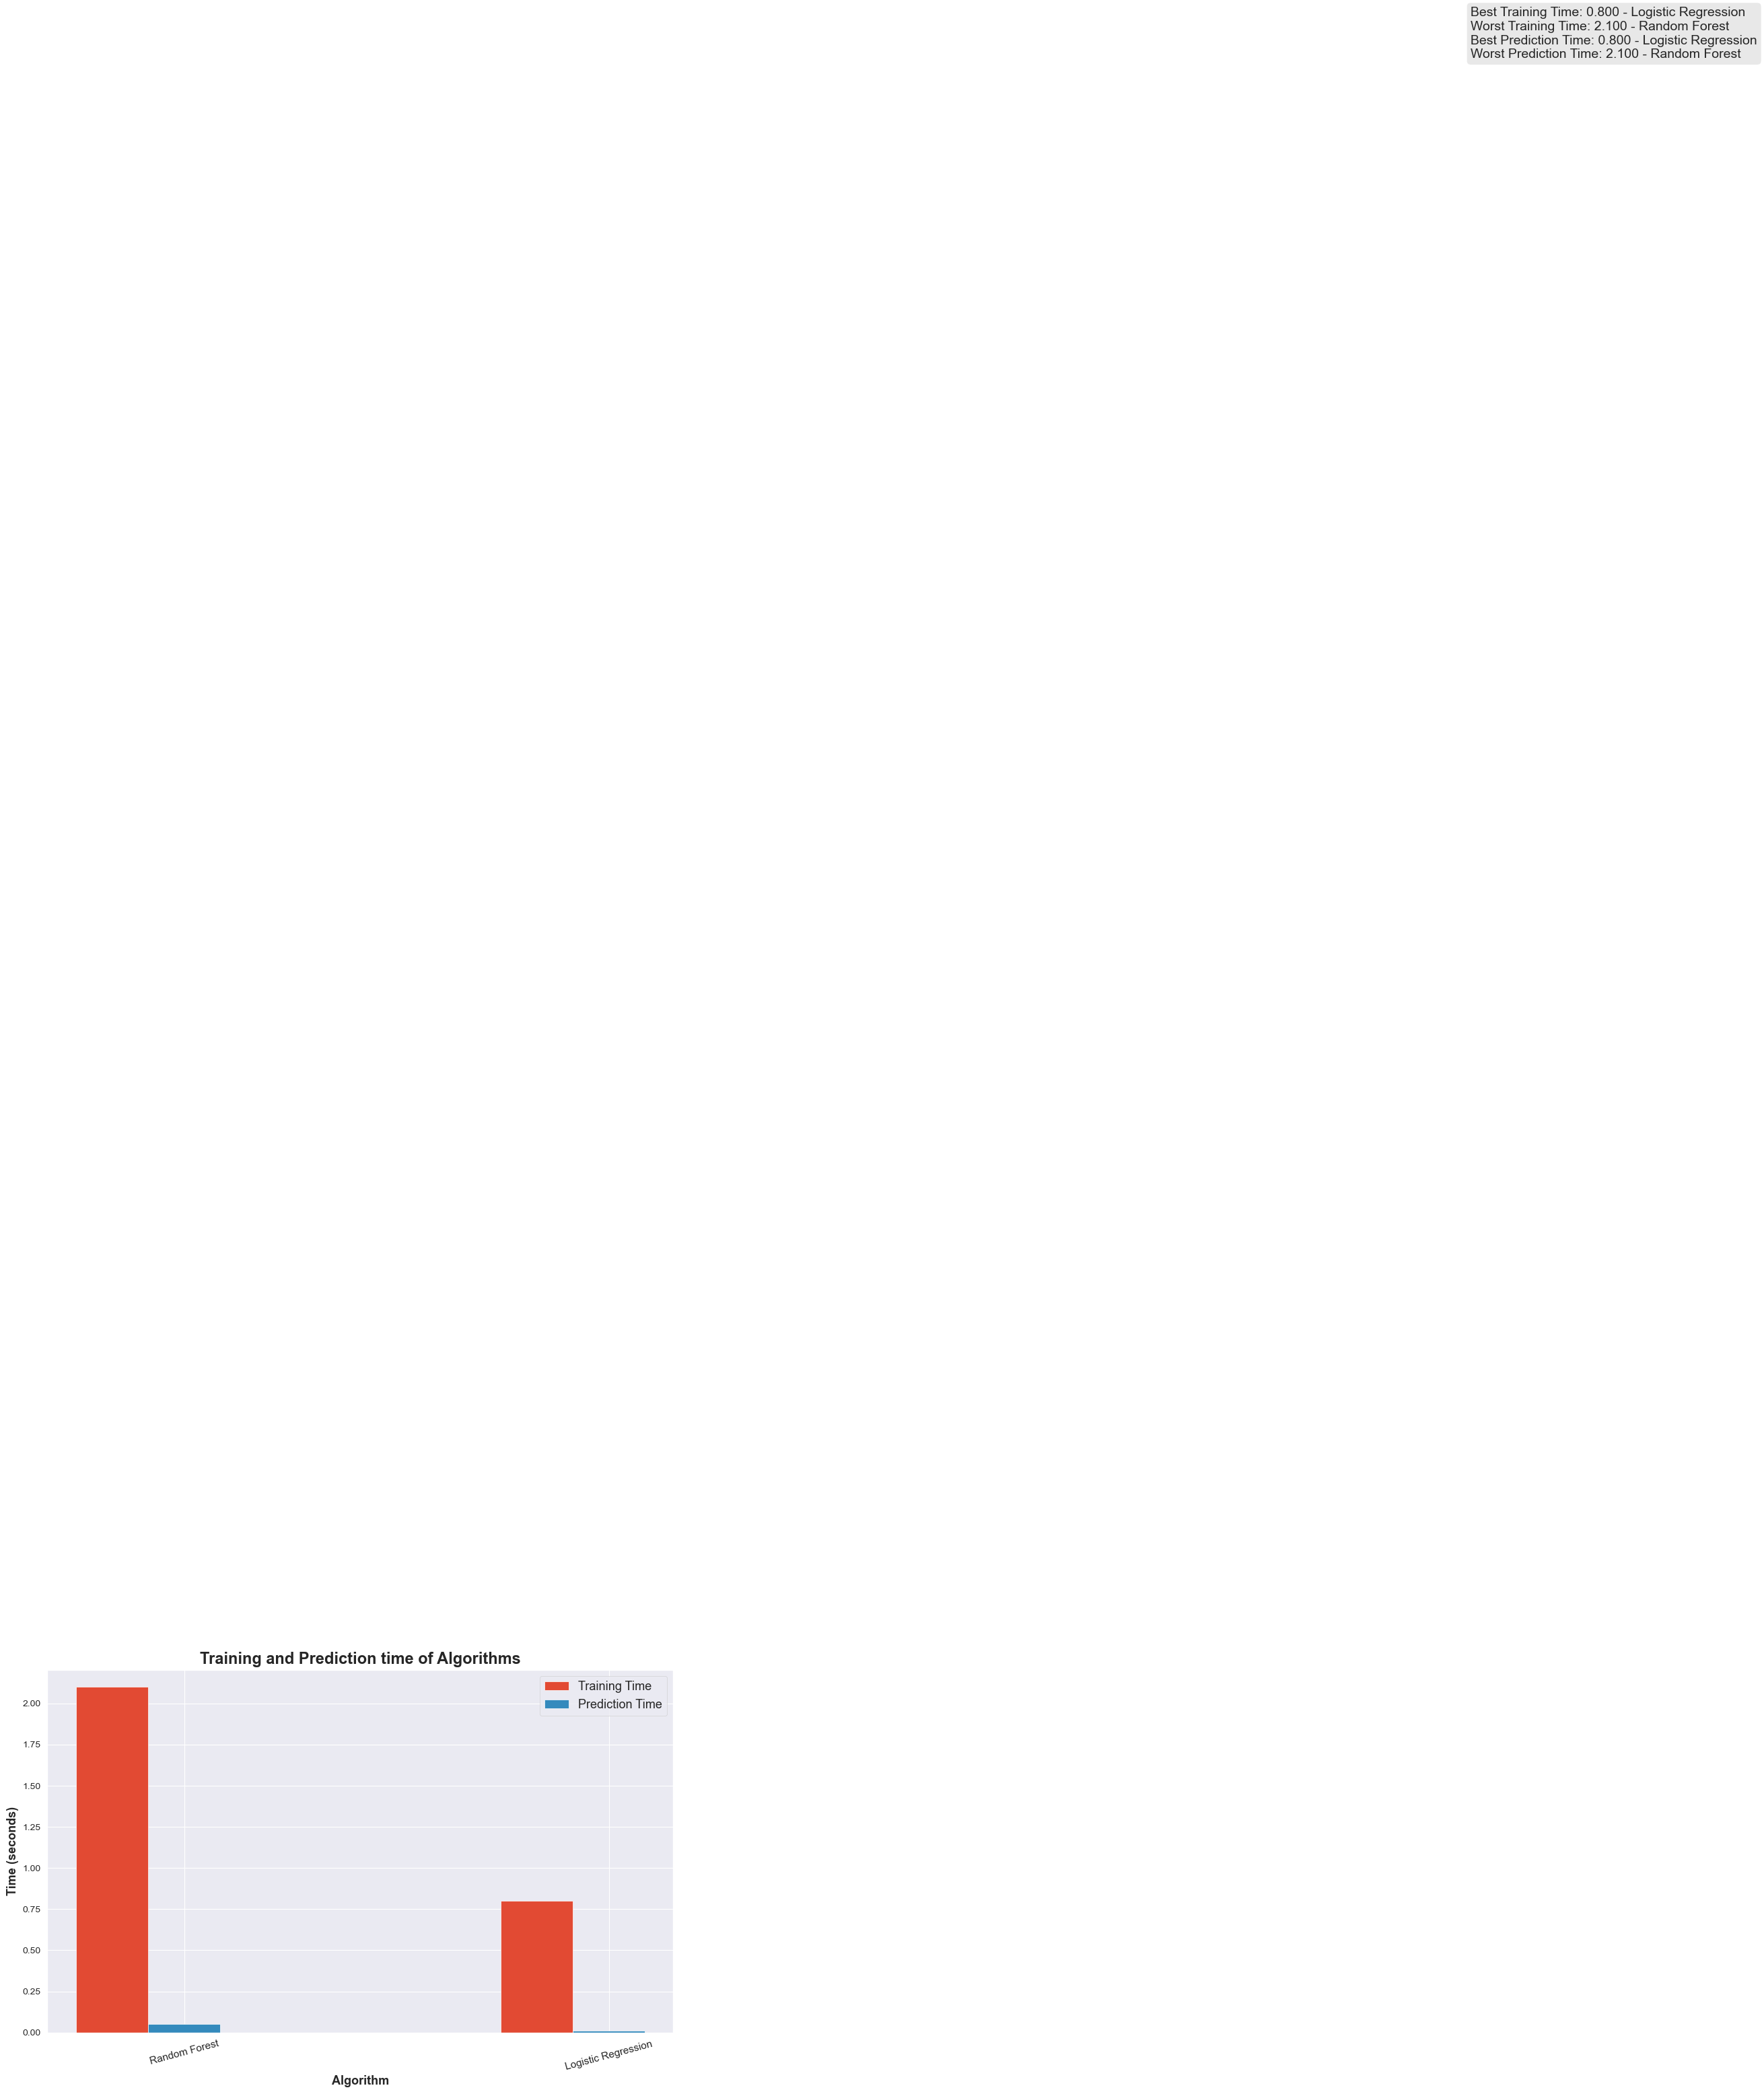

In [61]:

best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

plt.figure(figsize = (12, 7))

barWidth = 0.17

# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)


textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]),
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]),
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(3.2, 12, textstr, fontsize=14,  bbox=props)

# Create legend & Show graphic
plt.legend(fontsize = 13)
plt.title('Training and Prediction time of Algorithms', fontweight = 'bold', fontsize = 17)

# NOW WE WILL CREATING AN PREDICTIVE SYSTEM SO IT CAN PREDICT

In [ ]:
df.head()

,headline,label,length_headline
0,cock suck before you piss around on my work,1,44
1,you are gay or antisemmitian archangel white ...,1,624
2,fuck your filthy mother in the ass dry,1,39
3,get fuck ed up get fuck ed up got a drink t...,1,121
4,stupid peace of shit stop deleting my stuff ...,1,93


In [ ]:
df.tail()

,headline,label,length_headline
18143,deepak chahal se baga chutiya maine nahi dekha...,1,68
18144,carry ki maa ki chut,1,20
18145,ram kapoor ko priya se pyaar hai kya ?,0,38
18146,kya ram kapoor ki behen ke chut mai mera lund ...,1,61
18147,akshay kumar ki film aise aa rahi hai jaise su...,1,88


#Real Time Example

In [ ]:
data = ["You are so Stupid."]

tfidf_vector = TfidfVectorizer(stop_words=content_list, lowercase=True, vocabulary=pickle.load(open("tfidfvectoizer.pkl", "rb")))
preprocessed_data = tfidf_vector.fit_transform(data)

trained_model = pickle.load(open('LinearSVC.pkl', 'rb'))
print(trained_model.predict(preprocessed_data))

if(trained_model.predict(preprocessed_data)==1):
    print("bulling")
else:
    print("non-bulling")

[1]
bulling


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


In [ ]:
data = [" "]

tfidf_vector = TfidfVectorizer(stop_words=content_list, lowercase=True, vocabulary=pickle.load(open("tfidfvectoizer.pkl", "rb")))
preprocessed_data = tfidf_vector.fit_transform(data)

trained_model = pickle.load(open('LinearSVC.pkl', 'rb'))
print(trained_model.predict(preprocessed_data))

if(trained_model.predict(preprocessed_data)==1):
    print("bulling")
else:
    print("non-bulling")

[1]
bulling


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


Fine Tuining

In [ ]:
from sklearn.model_selection import GridSearchCV

def tuining(clf, param_dict, X_train, y_train, X_test, y_test):
    scorer = make_scorer(f1_score)

    grid_obj = GridSearchCV(estimator=clf, param_grid=param_dict, scoring=scorer, cv=5)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_clf = grid_fit.best_estimator_

    prediction = (clf.fit(X_train, y_train)).predict(X_test)

    best_prediction = best_clf.predict(X_test)

    print(clf.__class__.__name__)
    print(f"Best Parameter:  {grid_fit.best_params_}")

    print(f"Accuracy:  {accuracy_score(y_test, best_prediction)}")

    print(f"F1 Score :  {f1_score(y_test, best_prediction)}")

    print(f"Precision :  {precision_score(y_test, best_prediction)}")

    print(f"Recall:  {recall_score(y_test, best_prediction)}")

#Accuracy of our Model

In [ ]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_model = LinearSVC()

tuining(clf_model, param_grid, training_data, y_train, testing_data, y_test)

LinearSVC
Best Parameter:  {'C': 1.2}
Accuracy:  0.9644628099173553
F1 Score :  0.9724888035828535
Precision :  0.9733191035218783
Recall:  0.97165991902834


In [ ]:
pickle.dump(clf_model, open("LinearSVCTuned.pkl", "wb"))